In [50]:
# Import required modules
import pandas as pd

In [51]:
# Load the data
data = pd.read_csv(
    filepath_or_buffer="../data/raw/hotel_reservations.csv",
    sep=",",
    header=0
)

In [52]:
# Display the first few rows of the data
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [53]:
import sys

data.info(
    verbose=True,
    buf=sys.stdout,
    memory_usage=True,
    show_counts=True
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [54]:
# Select columns that have numerical data type
data.select_dtypes(include=['number']).head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0


### no_of_adults

In [55]:
data['no_of_adults'].describe()

count    36275.000000
mean         1.844962
std          0.518715
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: no_of_adults, dtype: float64

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

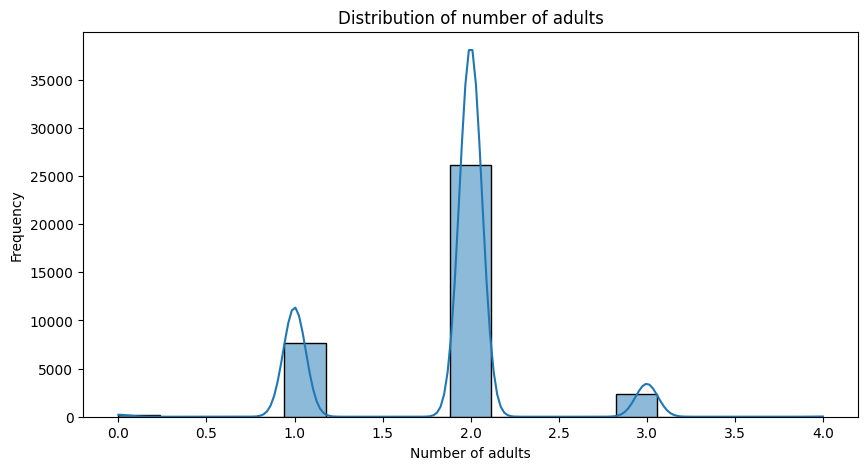

In [57]:
# Showing histogram
plt.figure(figsize=(10, 5))
sns.histplot(data['no_of_adults'], kde=True)
plt.title('Distribution of number of adults')
plt.xlabel('Number of adults')
plt.ylabel('Frequency')
plt.show()

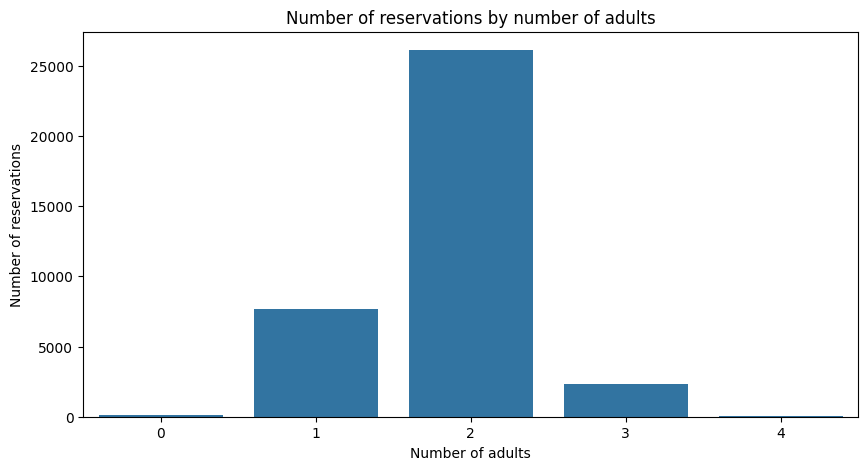

In [58]:
# Creating a bar plot for no_of_adults
plt.figure(figsize=(10, 5))
sns.countplot(x=data['no_of_adults'])
plt.title('Number of reservations by number of adults')
plt.xlabel('Number of adults')
plt.ylabel('Number of reservations')
plt.show()

In [59]:
from scipy.stats import shapiro

stat, p_value = shapiro(data['no_of_adults'])
print(f"Shapiro-Wilk test statistika: {stat}, p-vrednost: {p_value}")

if p_value > 0.05:
    print("Podaci imaju normalnu raspodelu (ne odbacuje se hipoteza H0).")
else:
    print("Podaci nemaju normalnu raspodelu (odbacuje se hipoteza H0).")

Shapiro-Wilk test statistika: 0.6928603649139404, p-vrednost: 0.0
Podaci nemaju normalnu raspodelu (odbacuje se hipoteza H0).


C:\Users\marij\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### no_of_children

In [60]:
data['no_of_children'].describe()

count    36275.000000
mean         0.105279
std          0.402648
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: no_of_children, dtype: float64

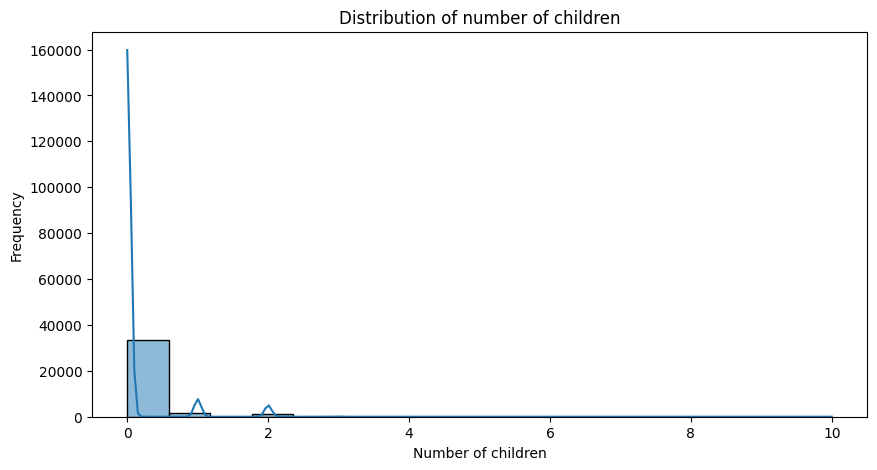

In [61]:
# Showing histogram for no_of_children
plt.figure(figsize=(10, 5))
sns.histplot(data['no_of_children'], kde=True)
plt.title('Distribution of number of children')
plt.xlabel('Number of children')
plt.ylabel('Frequency')
plt.show()

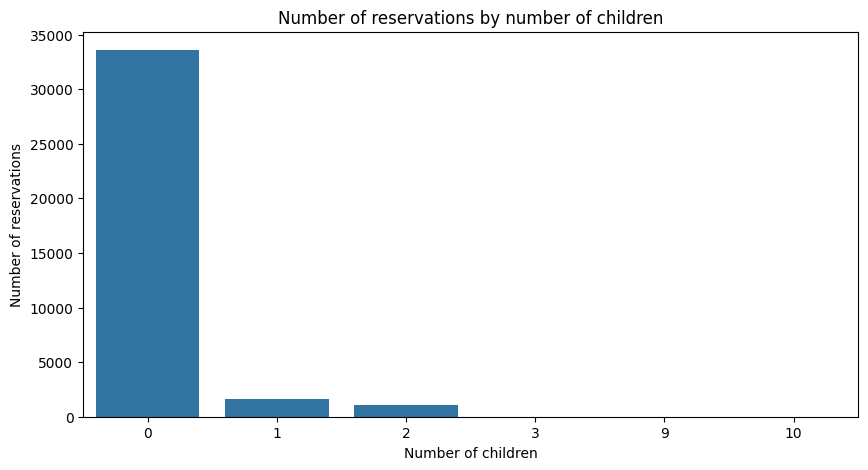

In [62]:
# Creating a bar plot for no_of_children
plt.figure(figsize=(10, 5))
sns.countplot(x=data['no_of_children'])
plt.title('Number of reservations by number of children')
plt.xlabel('Number of children')
plt.ylabel('Number of reservations')
plt.show()

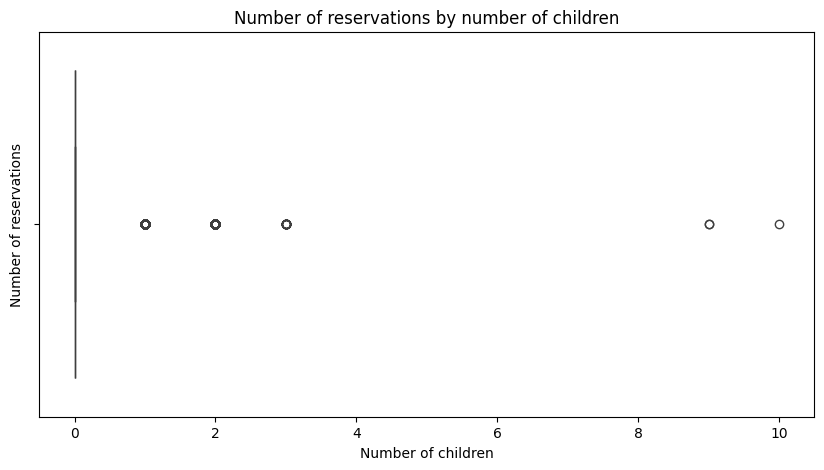

In [63]:
# Creating a box plot for no_of_children
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['no_of_children'])
plt.title('Number of reservations by number of children')
plt.xlabel('Number of children')
plt.ylabel('Number of reservations')
plt.show()

### no_of_weekend_nights

In [64]:
data['no_of_weekend_nights'].describe()

count    36275.000000
mean         0.810724
std          0.870644
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: no_of_weekend_nights, dtype: float64

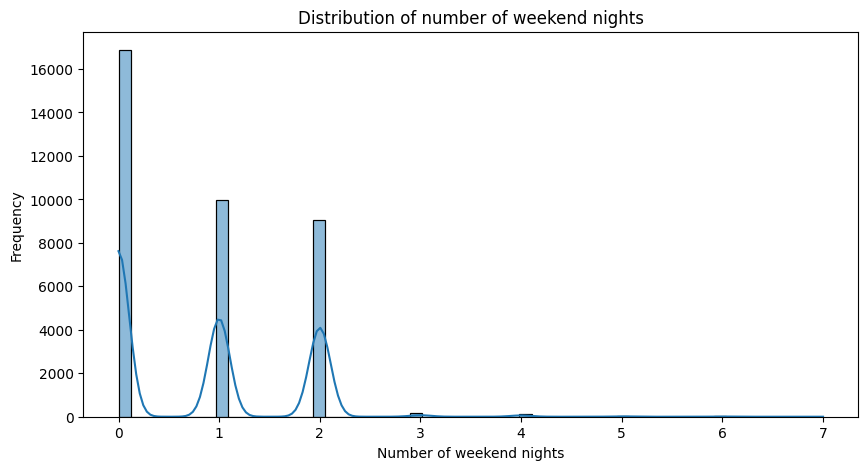

In [65]:
# Showing histogram for no_of_weekend_nights
plt.figure(figsize=(10, 5))
sns.histplot(data['no_of_weekend_nights'], kde=True)
plt.title('Distribution of number of weekend nights')
plt.xlabel('Number of weekend nights')
plt.ylabel('Frequency')
plt.show()

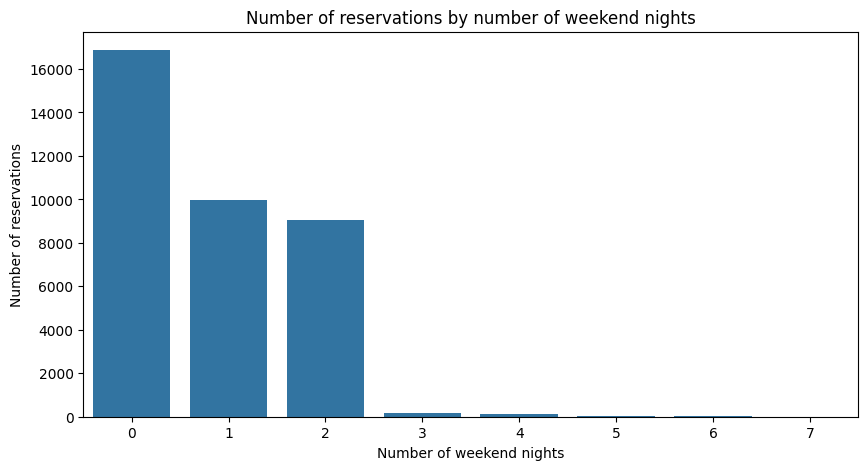

In [66]:
# Creating a bar plot for no_of_weekend_nights
plt.figure(figsize=(10, 5))
sns.countplot(x=data['no_of_weekend_nights'])
plt.title('Number of reservations by number of weekend nights')
plt.xlabel('Number of weekend nights')
plt.ylabel('Number of reservations')
plt.show()

### no_of_week_nights

In [79]:
data['no_of_week_nights'].describe()

count    36275.000000
mean         2.204300
std          1.410905
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         17.000000
Name: no_of_week_nights, dtype: float64

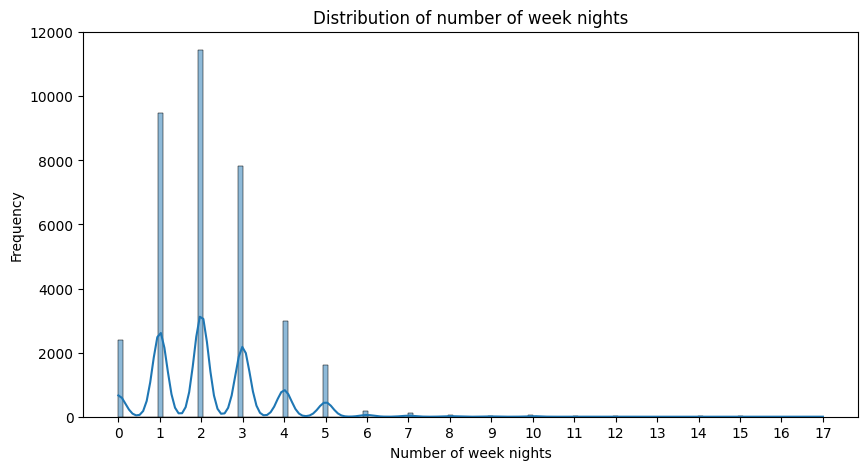

In [78]:
# Convert no_of_week_nights to integers
data['no_of_week_nights'] = data['no_of_week_nights'].astype(int)

# Showing histogram for no_of_week_nights
plt.figure(figsize=(10, 5))
sns.histplot(data['no_of_week_nights'], kde=True)
plt.title('Distribution of number of week nights')
plt.xlabel('Number of week nights')
plt.ylabel('Frequency')


# Set the x-axis ticks to the unique no_of_week_nights and format them as integers
unique_week_nights = sorted(data['no_of_week_nights'].unique())
plt.xticks(unique_week_nights)

plt.show()

### required_car_parking_space

In [80]:
data['required_car_parking_space'].describe()

count     36275
unique        2
top          No
freq      35151
Name: required_car_parking_space, dtype: object

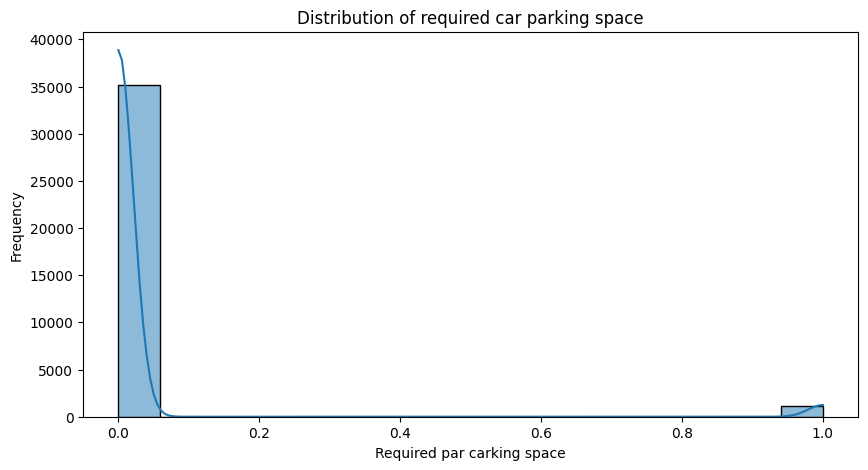

In [68]:
# Showing histogram for required_car_parking_space
plt.figure(figsize=(10, 5))
sns.histplot(data['required_car_parking_space'], kde=True)
plt.title('Distribution of required car parking space')
plt.xlabel('Required par carking space')
plt.ylabel('Frequency')
plt.show()

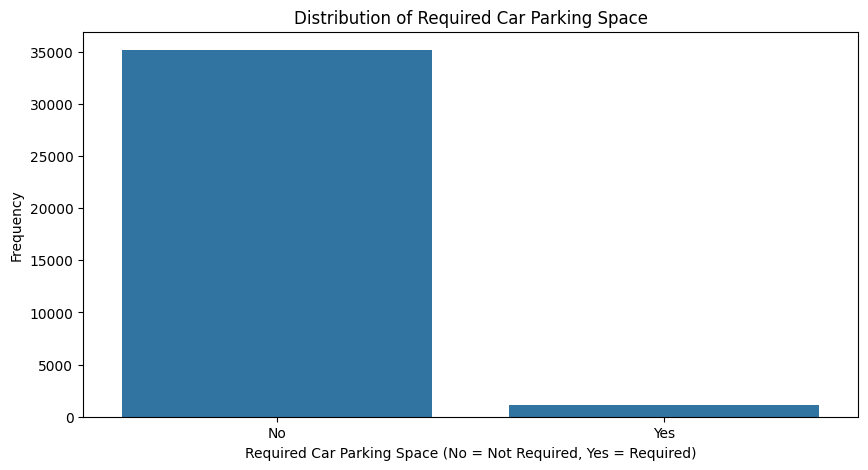

In [77]:
# Map the numerical values to 'No' and 'Yes'
data['required_car_parking_space'] = data['required_car_parking_space'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(10, 5))
sns.countplot(x=data['required_car_parking_space'])
plt.title('Distribution of Required Car Parking Space')
plt.xlabel('Required Car Parking Space (No = Not Required, Yes = Required)')
plt.ylabel('Frequency')
plt.show()


### lead_time

In [81]:
data['lead_time'].describe()

count    36275.000000
mean        85.232557
std         85.930817
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead_time, dtype: float64

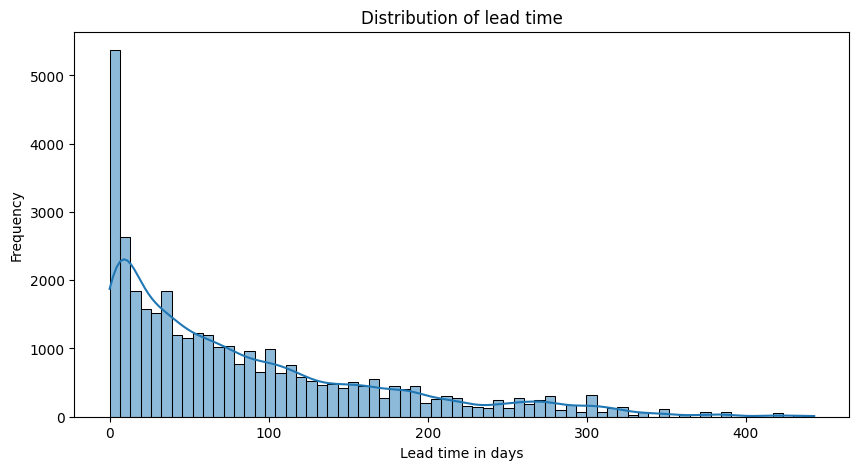

In [69]:
# Showing histogram for lead_time
plt.figure(figsize=(10, 5))
sns.histplot(data['lead_time'], kde=True)
plt.title('Distribution of lead time')
plt.xlabel('Lead time in days')
plt.ylabel('Frequency')
plt.show()

### arrival_year

In [70]:
from matplotlib.ticker import FuncFormatter

In [71]:
data['arrival_year'].describe()

count    36275.000000
mean      2017.820427
std          0.383836
min       2017.000000
25%       2018.000000
50%       2018.000000
75%       2018.000000
max       2018.000000
Name: arrival_year, dtype: float64

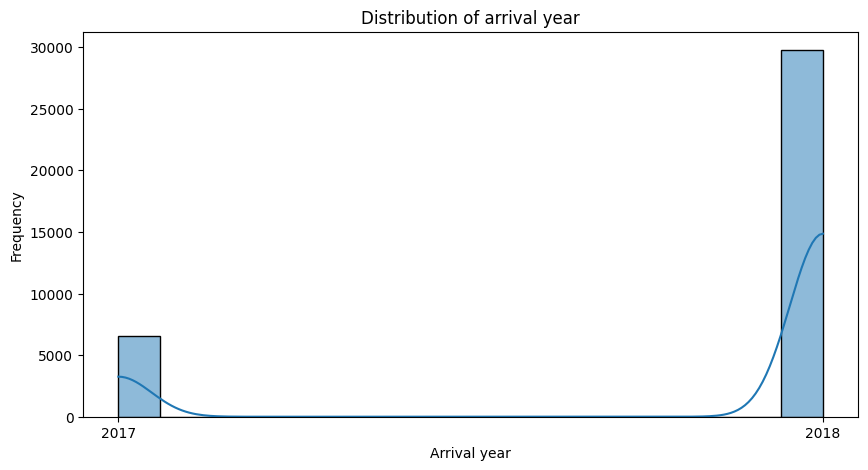

In [72]:
# Showing histogram for arrival_year

# Convert arrival_year to integers
data['arrival_year'] = data['arrival_year'].astype(int)


plt.figure(figsize=(10, 5))
sns.histplot(data['arrival_year'], kde=True)
plt.title('Distribution of arrival year')
plt.xlabel('Arrival year')
plt.ylabel('Frequency')

# Set the x-axis ticks to the unique years and format them as integers
unique_years = sorted(data['arrival_year'].unique())
plt.xticks(unique_years)

plt.show()

### arrival_month

In [82]:
data['arrival_month'].describe()

count    36275.000000
mean         7.423653
std          3.069894
min          1.000000
25%          5.000000
50%          8.000000
75%         10.000000
max         12.000000
Name: arrival_month, dtype: float64

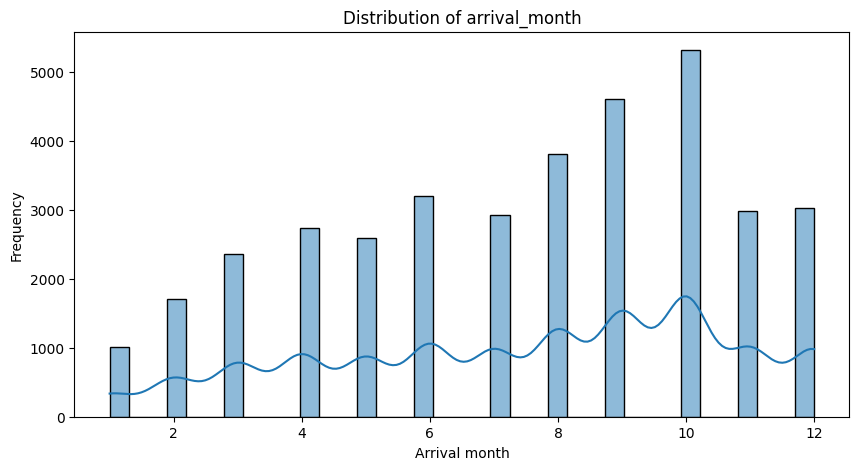

In [73]:
# Showing histogram for arrival_month
plt.figure(figsize=(10, 5))
sns.histplot(data['arrival_month'], kde=True)
plt.title('Distribution of arrival_month')
plt.xlabel('Arrival month')
plt.ylabel('Frequency')
plt.show()

### arrival_date

In [83]:
data['arrival_date'].describe()

count    36275.000000
mean        15.596995
std          8.740447
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date, dtype: float64

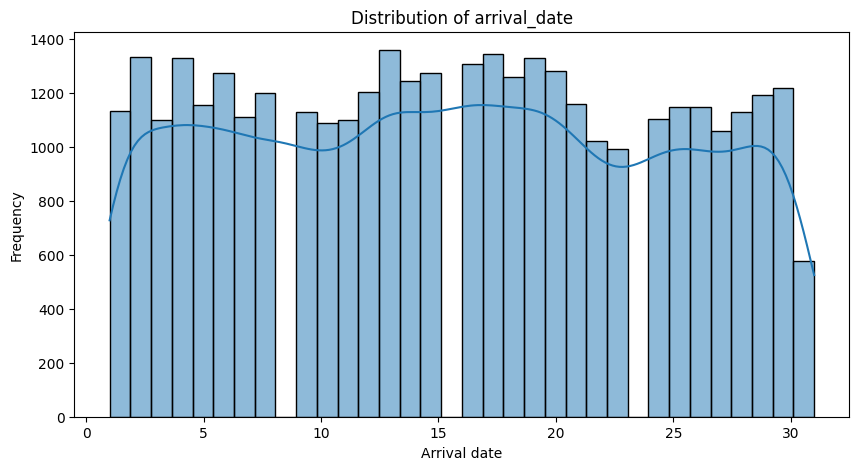

In [74]:
# Showing histogram for arrival_date
plt.figure(figsize=(10, 5))
sns.histplot(data['arrival_date'], kde=True)
plt.title('Distribution of arrival_date')
plt.xlabel('Arrival date')
plt.ylabel('Frequency')
plt.show()

### repeated_guest

In [84]:
data['repeated_guest'].describe()

count     36275
unique        2
top          No
freq      35345
Name: repeated_guest, dtype: object

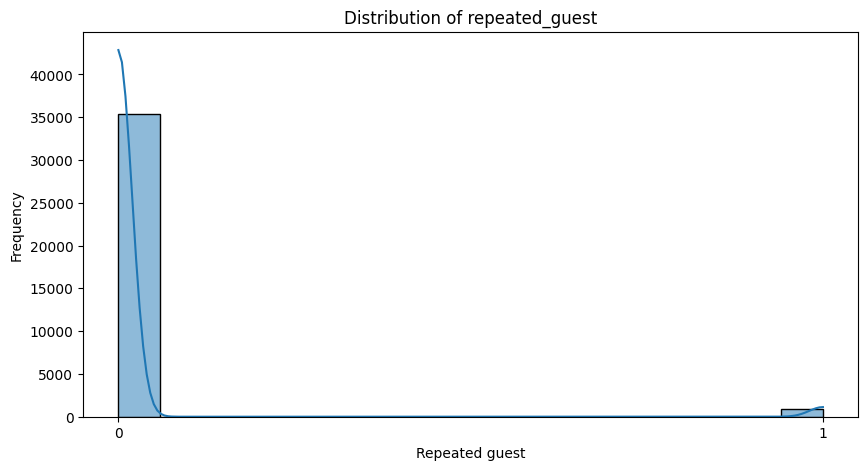

In [75]:
# Showing histogram for repeated_guest

# Convert repeated_guest to integer
data['repeated_guest'] = data['repeated_guest'].astype(int)


plt.figure(figsize=(10, 5))
sns.histplot(data['repeated_guest'], kde=True)
plt.title('Distribution of repeated_guest')
plt.xlabel('Repeated guest')
plt.ylabel('Frequency')

# Set the x-axis ticks to the unique years and format them as integers
repeated_guests = sorted(data['repeated_guest'].unique())
plt.xticks(repeated_guests)

plt.show()

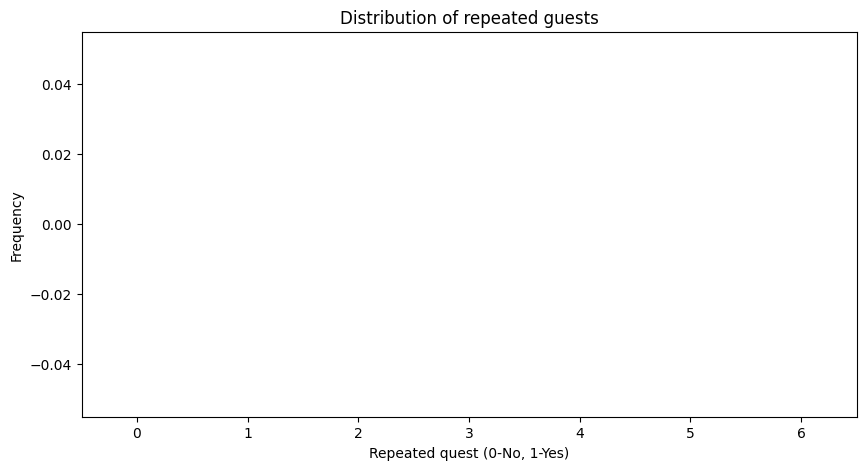

In [49]:
# Creating a bar plot for repeated_guest
plt.figure(figsize=(10, 5))
sns.countplot(x=data['repeated_guest'])
plt.title('Distribution of repeated guests')
plt.xlabel('Repeated quest (0-No, 1-Yes)')
plt.ylabel('Frequency')
plt.show()

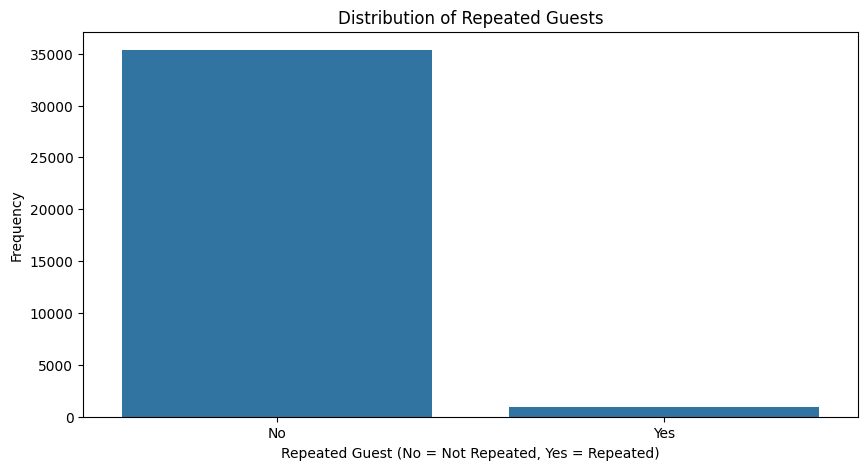

In [76]:
# Map the numerical values to 'No' and 'Yes'
data['repeated_guest'] = data['repeated_guest'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(10, 5))
sns.countplot(x=data['repeated_guest'])
plt.title('Distribution of Repeated Guests')
plt.xlabel('Repeated Guest (No = Not Repeated, Yes = Repeated)')
plt.ylabel('Frequency')
plt.show()

### no_of_previous_cancellations

In [85]:
data['no_of_previous_cancellations'].describe()

count    36275.000000
mean         0.023349
std          0.368331
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: no_of_previous_cancellations, dtype: float64

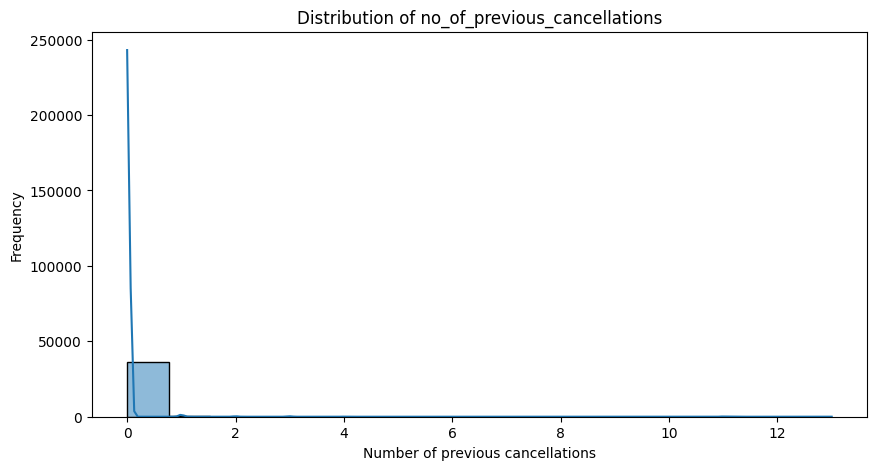

In [37]:
# Showing histogram for no_of_previous_cancellations

plt.figure(figsize=(10, 5))
sns.histplot(data['no_of_previous_cancellations'], kde=True)
plt.title('Distribution of no_of_previous_cancellations')
plt.xlabel('Number of previous cancellations')
plt.ylabel('Frequency')

plt.show()

### no_of_previous_bookings_not_canceled

In [86]:
data['no_of_previous_bookings_not_canceled'].describe()

count    36275.000000
mean         0.153411
std          1.754171
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: no_of_previous_bookings_not_canceled, dtype: float64

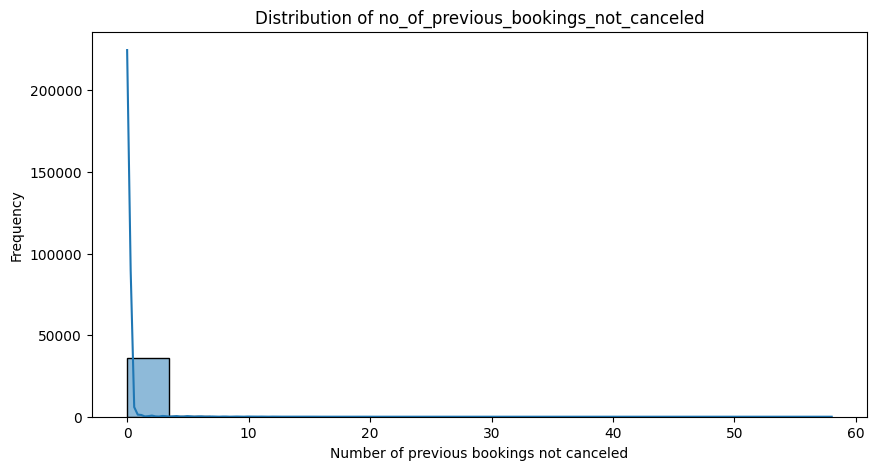

In [38]:
# Showing histogram for no_of_previous_bookings_not_canceled

plt.figure(figsize=(10, 5))
sns.histplot(data['no_of_previous_bookings_not_canceled'], kde=True)
plt.title('Distribution of no_of_previous_bookings_not_canceled')
plt.xlabel('Number of previous bookings not canceled')
plt.ylabel('Frequency')

plt.show()

### avg_price_per_room

In [87]:
data['avg_price_per_room'].describe()

count    36275.000000
mean       103.423539
std         35.089424
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: avg_price_per_room, dtype: float64

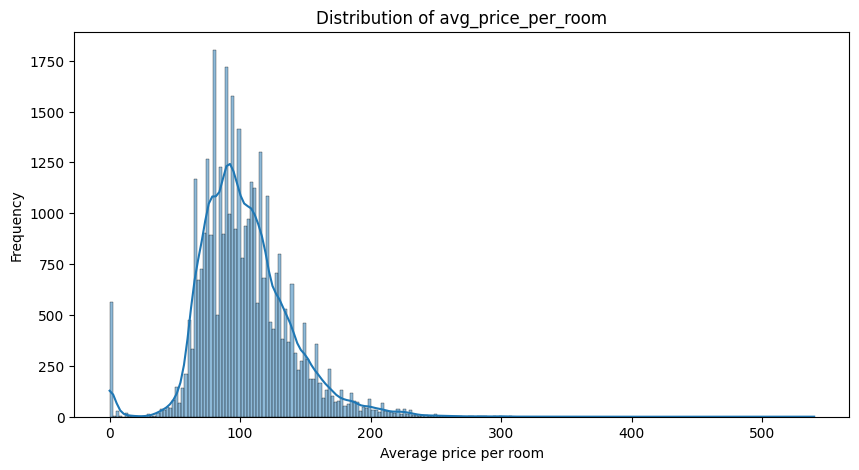

In [39]:
# Showing histogram for avg_price_per_room

plt.figure(figsize=(10, 5))
sns.histplot(data['avg_price_per_room'], kde=True)
plt.title('Distribution of avg_price_per_room')
plt.xlabel('Average price per room')
plt.ylabel('Frequency')

plt.show()

### no_of_special_requests

In [88]:
data['no_of_special_requests'].describe()

count    36275.000000
mean         0.619655
std          0.786236
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: no_of_special_requests, dtype: float64

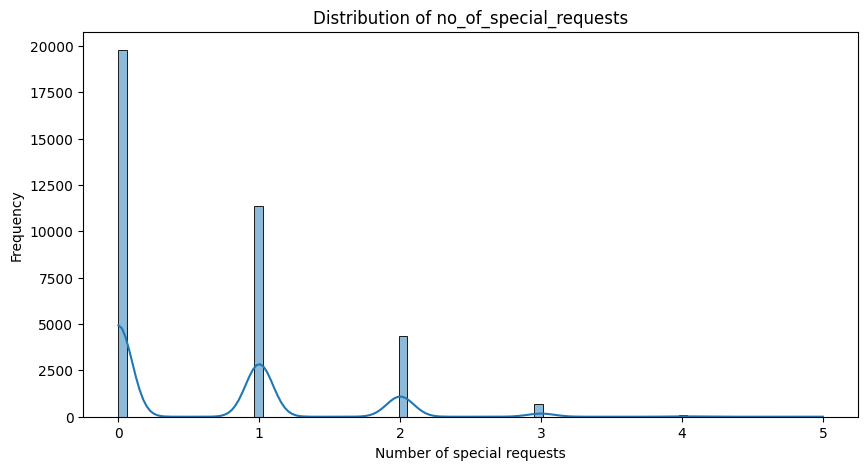

In [40]:
# Showing histogram for no_of_special_requests

plt.figure(figsize=(10, 5))
sns.histplot(data['no_of_special_requests'], kde=True)
plt.title('Distribution of no_of_special_requests')
plt.xlabel('Number of special requests')
plt.ylabel('Frequency')

plt.show()